In [4]:
import pandas as pd
import plotly.graph_objects as go

df_raw = pd.read_csv('raw.csv')

<AxesSubplot: >

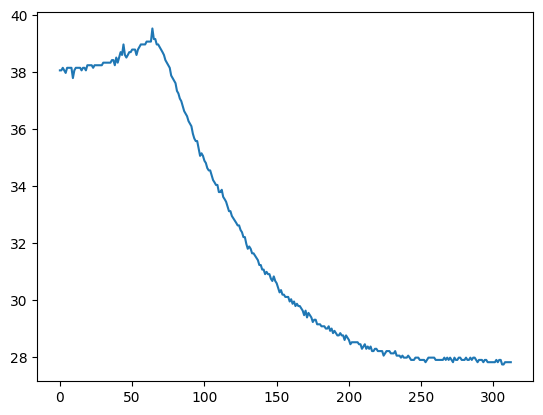

In [5]:
df_raw['Temp'].plot()

In [6]:
def regra_de_tres(x):
    return 100*x/255

print(df_raw.shape)
df_raw.head()

(313, 2)


,PWM,Temp
0,1,38.06
1,2,38.06
2,3,38.15
3,4,38.06
4,5,37.97


In [7]:
def df_treat_and_plot(df, title):
    df['PWMPerctg'] = df['PWM'].apply(lambda x: regra_de_tres(x))
    fig = go.Figure()
    fig.add_trace(go.Scatter(name='Temperatura', x = df.index, y = df['Temp'], mode = 'lines+markers'))
    fig.add_trace(go.Scatter(name='PWM (%)', x = df.index, y = df['PWMPerctg'],  mode = 'lines+markers'))
    fig.update_layout(title={'text':'Sistema Térmico AV1 MCII ' + title})
    fig.show()

In [8]:
df_treat_and_plot(df_raw, '(raw data)')

In [9]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(249, 2)


,PWM,Temp
0,65,39.53
1,66,39.16
2,67,39.16
3,68,38.97
4,69,38.97


In [10]:
df_treat_and_plot(df, '(Original sample)')

In [11]:
import pandas as pd
import numpy as np

def interpolate(df):
    interpolated_rows = []

    # Iterate through the rows of the original DataFrame
    for i in range(len(df) - 1):
        row1 = df.iloc[i]
        row2 = df.iloc[i + 1]
        
        pwm_range = np.arange(row1['PWM'], row2['PWM'], 0.2)
        temp_range = np.interp(pwm_range, [row1['PWM'], row2['PWM']], [row1['Temp'], row2['Temp']])
        
        # Append the interpolated rows to the list
        for pwm, temp in zip(pwm_range, temp_range):
            interpolated_rows.append({'PWM': pwm, 'Temp': temp})

    # Add the last row of the original DataFrame
    last_row = df.iloc[-1]
    interpolated_rows.append({'PWM': last_row['PWM'], 'Temp': last_row['Temp']})

    # Create a new DataFrame with the interpolated values
    df_interp = pd.DataFrame(interpolated_rows)

    # Use interpolate to fill NaN values in the 'Temp' column
    df_interp['Temp'] = df_interp['Temp'].interpolate()

    # Result
    return df_interp


In [12]:
df_interp = interpolate(df)
print(df_interp.shape)
df_interp.head()

(951, 2)


,PWM,Temp
0,65.0,39.530
1,65.2,39.456
2,65.4,39.382
3,65.6,39.308
4,65.8,39.234


In [13]:
df_treat_and_plot(df_interp, '(Resampled)')

In [14]:
df_shuf = df.sample(
    frac=1,
    random_state=1
).reset_index(drop=True)
df_shuf['PWMPerctg'] = df_shuf['PWM'].apply(lambda x: regra_de_tres(x))

In [15]:
df_shuf.head()

,PWM,Temp,PWMPerctg
0,132,31.88,51.764706
1,255,27.82,100.000000
2,255,27.90,100.000000
3,226,28.13,88.627451
4,156,30.19,61.176471


In [16]:
df_interp.to_csv('interpdata.csv')